<a href="https://colab.research.google.com/github/kokejohh/PMU_Module_1/blob/main/Copy_of_Quiz_Data_Analytics_Excercies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics : Exercises**
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2024-07-14
---

#### Student: Pitchakorn Thiprangsi

Reference: https://www.kaggle.com/datasets/carrie1/ecommerce-data

**ความหมายแต่ละคอลัมน์**

* **⁠InvoiceNo**: คือ หมายเลขใบเสร็จ (invoice number)
* **StockCode**: คือ รหัสสินค้า (code number of a product item)
* **Description**: คือ ชื่อสินค้า (description of a product item)
* **Quantity**: คือ จำนวนสินค้านั้นที่ซื้อในใบเสร็จ (number of each product item in an invoice)
* **InvoiceDate**: คือ วันที่/เวลา ของใบเสนอราคา
* **UnitPrice**: คือ ราคาสินค้าต่อชิ้น (price per unit)
* **CustomerID**: คือ รหัสลูกค้า
* **Country**: คือ ประเทศของลูกค้า



---



## Import

In [2]:
import numpy as np
import pandas as pd

## Examples
ตัวอย่างสำหรับเริ่มต้น

In [1]:
CSV_PATH = "https://rathachai.github.io/DA-LAB/datasets/ecom-dat.csv"

In [3]:
df = pd.read_csv(CSV_PATH)

In [7]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46855 entries, 0 to 46854
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    46855 non-null  int64  
 1   StockCode    46855 non-null  object 
 2   Description  46855 non-null  object 
 3   Quantity     46855 non-null  int64  
 4   InvoiceDate  46855 non-null  object 
 5   UnitPrice    46855 non-null  float64
 6   CustomerID   46855 non-null  float64
 7   Country      46855 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.9+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom
...,...,...,...,...,...,...,...,...
46850,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46851,581581,23561,SET OF 6 RIBBONS PARTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46852,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,12/9/2011 12:20,1.65,17581.0,United Kingdom
46853,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,12/9/2011 12:21,2.08,17581.0,United Kingdom


In [8]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85


---
### (Ex-01) จงหาลูกค้าที่ซื้อสินค้าบ่อยที่สุด 5 คนแรก

Find top-5 most-frequence buyers.

In [23]:
dfg = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(5) # Series
dfg2 = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).sort_values('InvoiceNo', ascending=False).head(5) # DataFrame

display(dfg)
display(dfg2)

,InvoiceNo
CustomerID,
14911.0,197
14606.0,93
13408.0,60
13767.0,37
16133.0,32


,InvoiceNo
CustomerID,
14911.0,197
14606.0,93
13408.0,60
13767.0,37
16133.0,32


---
### (Ex-02) จงหาความถี่การใช้จ่ายตามรายชั่วโมง

Find the number of invoices in each hour.

In [35]:
df['InvDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [38]:
df['hr'] = df['InvDate'].dt.hour

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9
...,...,...,...,...,...,...,...,...,...,...,...
46850,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom,17.34,2011-12-09 12:20:00,12
46851,581581,23561,SET OF 6 RIBBONS PARTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom,17.34,2011-12-09 12:20:00,12
46852,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,12/9/2011 12:20,1.65,17581.0,United Kingdom,16.50,2011-12-09 12:20:00,12
46853,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,12/9/2011 12:21,2.08,17581.0,United Kingdom,12.48,2011-12-09 12:21:00,12


In [44]:
df_by_hr = df.groupby('hr')['InvoiceNo'].nunique()
df_by_hr

,InvoiceNo
hr,
7,2
8,59
9,180
10,291
11,262
12,354
13,307
14,264
15,212


<Axes: xlabel='hr'>

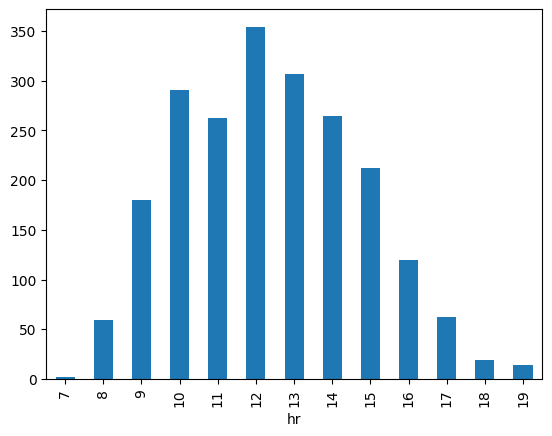

In [45]:
df_by_hr.plot.bar()



---



---


## Basic Exercises
โจทย์อย่างง่าย

### (B-01) จงนับจำนวน Invoice

To count the number of invoices.

In [48]:
df['InvoiceNo'].nunique()

2146

---
### (B-02) จงนับจำนวนลูกค้า

To count the number of customers.

In [51]:
df['CustomerID'].nunique()

486

---
### (B-03) จงนับจำนวนสินค้า

To count the number of product items.

hint
- description

In [54]:
df['Description'].nunique()

3202

---
### (B-04) มีประเทศใดบ้าง

List all countries.

In [55]:
df['Country'].unique()

array(['United Kingdom', 'Germany', 'EIRE', 'Japan', 'France',
       'Channel Islands', 'Denmark', 'Cyprus', 'Austria', 'Switzerland',
       'United Arab Emirates', 'Czech Republic', 'Spain', 'Italy',
       'European Community', 'Canada', 'Finland', 'Norway', 'Portugal'],
      dtype=object)

---
### (B-05) จงคำนวณจำนวนรายได้ทั้งหมด


To find total revenue.

In [56]:
df['Total'].sum()

np.float64(753421.941)

---
### (B-06) จงหาค่าใช้จ่ายเฉลี่ยต่อการซื้อ


To find average revenue of each invoice.

In [61]:
df.groupby('InvoiceNo')['Total'].sum().mean()

np.float64(351.08198555452003)

---
### (B-07) จงหาค่าใช้จ่ายเฉลี่ยต่อลูกค้า


To find average expense of each customer.

In [62]:
df.groupby('CustomerID')['Total'].sum().mean()

np.float64(1550.2509074074073)



---



---


## Advanced Exercises

โจทย์ยากขึ้น

### (Q-01) ลูกค้าจากประเทศใดมีการใช้จ่ายสูงที่สุด

Which country has the most expense?


hint:
- groupby country
- sum total
- เรียงจากมากไปน้อย (order from max to min)
- เลือกแถวแรก (select the first row)

In [74]:
df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(1)

,Total
Country,
United Kingdom,540707.491


---
### (Q-02) Invoice ใด มีจำนวนชิ้นสินค้าสูงที่สุด

Which invoice has the most number of quantity?

In [75]:
df.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False).head(1)

,Quantity
InvoiceNo,
567183,2673


---
### (Q-03) Invoice ใด มีค่าใช้จ่ายสูงที่สุด

Which inovice has the most expense?

In [78]:
df.groupby('InvoiceNo')['Total'].sum().sort_values(ascending=False).head(1)

,Total
InvoiceNo,
567183,3829.09


---
### (Q-04) Invoice ใด มีชนิดสินค้ามากที่สุด

Which invoice has the most number of product item?

hint
- nunique

In [82]:
df.groupby('InvoiceNo')['Description'].nunique().sort_values(ascending=False).head(1)

,Description
InvoiceNo,
567183,385


---
### (Q-05) ลูกค้าใดซื้อสินค้าบ่อยที่สุด

Who is the top most-frequence buyer?

In [84]:
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(1)

,InvoiceNo
CustomerID,
14911.0,197


---
### (Q-06) จงแสดงจำนวนลูกค้าในแต่ละประเทศด้วยกราฟแทงแนวนอน

Display the number of customers in every country by a horizontal bar chart.

hint
- nunique
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

<Axes: ylabel='Country'>

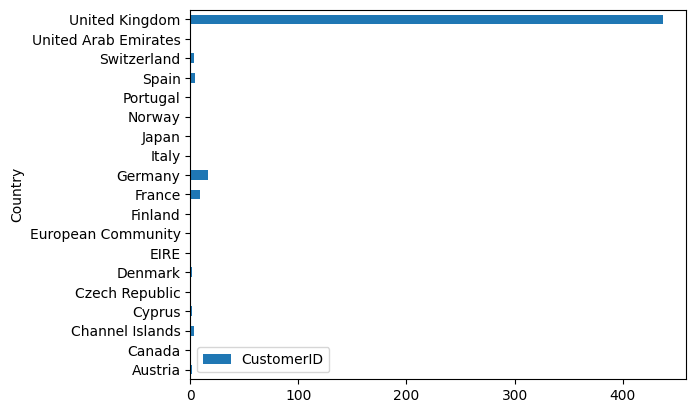

In [88]:
df.groupby('Country')[['CustomerID']].nunique().plot.barh()

---
### (Q-07) จงแสดงจำนวน invoice ในแต่ละวันในสัปดาห์ ในรูปกราฟแท่ง

Display the number of invoices in every day of week in a bar chart.

hint
- ลองค้นหาด้วย "pandas dayofweek"
- Try searching by "pandas dayofweek"

<Axes: xlabel='dow'>

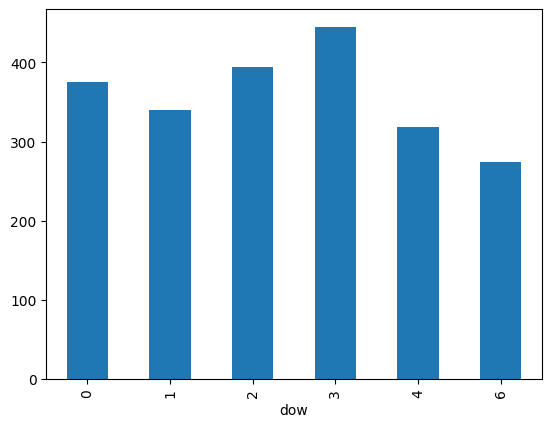

In [102]:
df['dow'] = df['InvDate'].dt.day_of_week
df.groupby('dow')['InvoiceNo'].nunique().plot.bar()

---
### (Q-08) จงแสดงจำนวนรายได้ในแต่ละเดือน ในรูปกราฟแท่ง

Display the number of monthly revenue by a bar chart.

hint
- ลองค้นหาด้วย (google by) "pandas datetime strftime"
- ใช้รูปแบบ (date format) "%Y-%m"

<Axes: xlabel='month'>

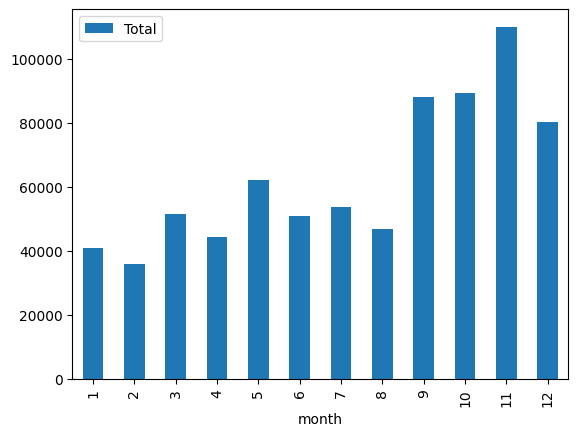

In [107]:
df['month'] = df['InvDate'].dt.month
df.groupby('month')[['Total']].sum().plot.bar()

---
### (Q-09) จงหา top 5 สินค้าใดขายดีในเดือน 12

Which are top-5 products in December?


In [136]:
df[df['month'] == 12].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head()

# df.groupby(['month', 'Description'])[['Quantity']].sum().sort_values(['month', 'Quantity'], ascending=[True, False]).loc[12].head(5)
# df.groupby(['month', 'Description'])[['Quantity']].sum().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('Quantity', ascending=False)).loc[[12]].head()

,Quantity
Description,
ASSORTED COLOUR BIRD ORNAMENT,386
WORLD WAR 2 GLIDERS ASSTD DESIGNS,339
PAPER CHAIN KIT 50'S CHRISTMAS,323
PAPER CHAIN KIT VINTAGE CHRISTMAS,314
PACK OF 72 RETROSPOT CAKE CASES,298


---
### (Q-10) จงหา top 5 สินค้าประเภทไม้ที่ขายได้ดีในเดือน 12

Which are top-5 wooden products in December?

hint
- มีคำว่า (description contains) "WOODEN"
- ลองค้นหาด้วยคำว่า (google by) "pandas string contains"

In [144]:
# df2 = df[:]
# df2.loc[:, 'Description'] = df['Description'].str.strip()
# df2.loc[:, 'Description'] = df2['Description'].apply(lambda x: x.strip())
# df2.loc[:, 'Description'] = df2.apply(lambda x: x['Description'].strip(), axis=1)
# df2

df[(df['month'] == 12) & (df['Description'].str.contains('WOODEN'))].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head()

,Quantity
Description,
WOODEN HEART CHRISTMAS SCANDINAVIAN,122
WOODEN STAR CHRISTMAS SCANDINAVIAN,116
WOODEN BOX OF DOMINOES,111
SWALLOW WOODEN CHRISTMAS DECORATION,61
PEACE WOODEN BLOCK LETTERS,58


---
### (Q-11) สินค้าที่มีคำว่า CHRISTMAS ขายได้ดีที่สุดในเดือนใด

What is the top month that can sell the most products containing "CHRISTMAS"?

In [153]:
df[df['Description'].str.contains('CHRISTMAS')].groupby('month')[['Quantity']].sum().sort_values('Quantity', ascending=False).head(1)

,Quantity
month,
11,9086


---
### (Q-12) ลูกค้าคนใดบ้างที่ซื้อสินค้าแทบทุกเดือน

Which customers buy every month?

hint
- groupby ลูกค้า, แล้วนับเดือน
- เรียงจากมากไปน้อย
- เลือกลูกค้าที่มีคะแนนสูงสุด (อาจจะมีหลายคน)

hint
- groupby customer, then count unique month-year
- sort from max-to-min
- select customers having top score (may be many customers)

In [195]:
df2 = df.groupby('CustomerID')['month'].nunique().sort_values( ascending=False).reset_index()
df2[df2['month'] == df2['month'].max()]

,CustomerID,month
0,14911.0,12
1,14606.0,12
2,18109.0,12
3,13408.0,12
4,13319.0,12
5,14796.0,12


---
### (Q-13) จงจัดกลุ่มลูกค้าตามจำนวน invoice และราคาในการซื้อสินค้า ของแต่ละคน

Make groups of customers based on number of invoices and total expense.

hint 😵




---
https://rathachai.creatier.pro/

## つづく
